In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
notes = pd.read_csv("data.tsv", sep="\t")

In [3]:
notes = notes[notes.CREATED_AT > '2019']
notes = notes[notes.CREATED_AT < '2022-05']
notes = notes.set_index(pd.DatetimeIndex(notes.CREATED_AT))

In [4]:
notes_per_month = notes.resample('M').sum()
notes_per_month['LAST_YEAR_NOTES'] = notes_per_month.NOTES.shift(12)
notes_per_month['YOY_GROWTH_ABS'] = notes_per_month.NOTES - notes_per_month.LAST_YEAR_NOTES
notes_per_month['YOY_GROWTH_REL'] = ((notes_per_month.NOTES / notes_per_month.LAST_YEAR_NOTES) - 1)*100

notes_per_month['YOY_GROWTH_ABS_ACCELERATION'] = notes_per_month['YOY_GROWTH_ABS'] - notes_per_month['YOY_GROWTH_ABS'].shift(12)



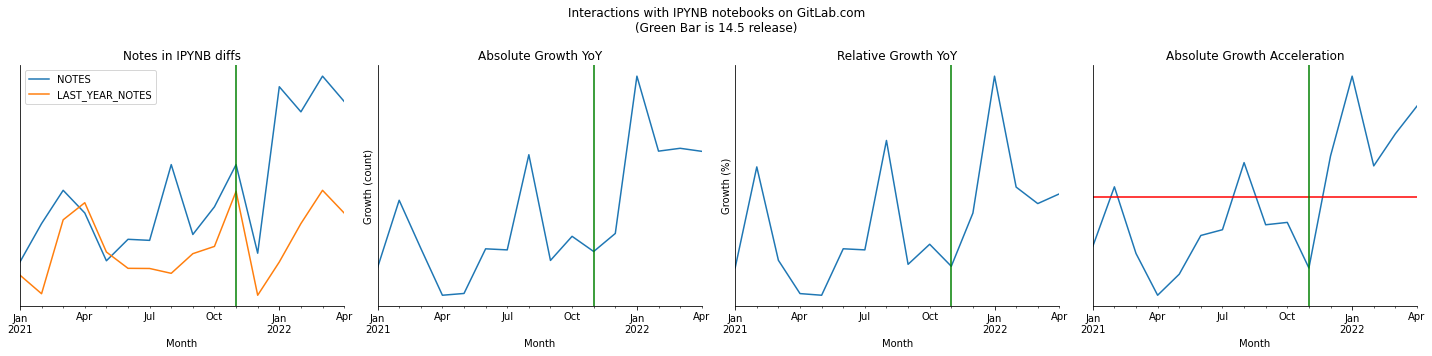

In [5]:
# with plt.xkcd():
fig, axis = plt.subplots(ncols=4, nrows=1, figsize=(20,5), facecolor='white')

ax = axis.flatten()

fig.suptitle('Interactions with IPYNB notebooks on GitLab.com\n(Green Bar is 14.5 release)')

notes_to_plot = notes_per_month[notes_per_month.index > '2021']


notes_to_plot[['NOTES', 'LAST_YEAR_NOTES']].plot(
    ax=ax[0], 
    label=["Notes in Month", "Notes in Previous Years Month"],
    title='Notes in IPYNB diffs',
    legend=True)

notes_to_plot.YOY_GROWTH_ABS.plot(ax=ax[1], title="Absolute Growth YoY", ylabel='Growth (count)')
notes_to_plot.YOY_GROWTH_REL.plot(ax=ax[2], title="Relative Growth YoY", ylabel='Growth (%)')
notes_to_plot.YOY_GROWTH_ABS_ACCELERATION.plot(title='Absolute Growth Acceleration')

ax[3].axhline(0, color='red')

for a in ax:
    a.axvline('2021-11-26', color='green')
    a.spines['right'].set_visible(False)
    a.spines['top'].set_visible(False)
    a.set_xlabel('Month')
    a.set_yticks([])

fig.tight_layout()